109. Convert Sorted List to Binary Search Tree

Given the head of a singly linked list where elements are sorted in ascending order, convert it to a 
height-balanced
 binary search tree.

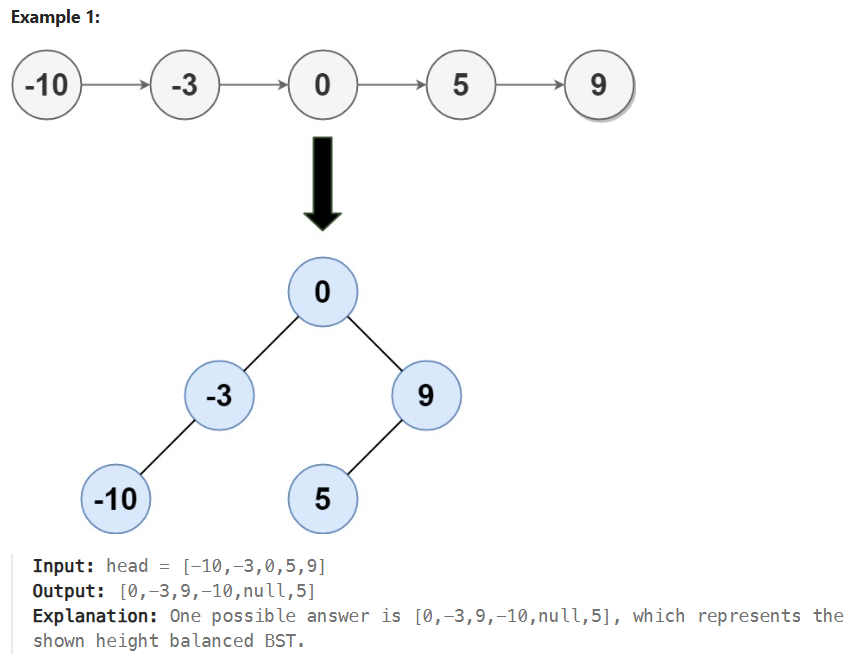

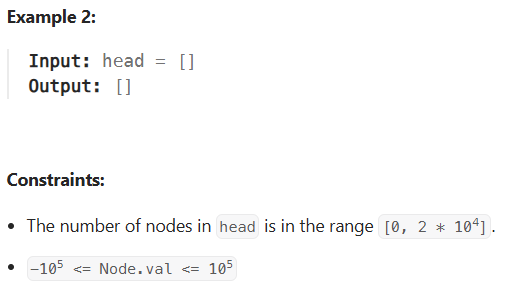

In [ ]:
class Solution(object):
    def sortedListToBST(self, head):
        def find_mid(l_ptr, r_ptr):
            ptr_slow = l_ptr
            ptr_fast = l_ptr
        
            while ptr_fast != r_ptr and ptr_fast.next != r_ptr:
                ptr_fast = ptr_fast.next.next
                ptr_slow = ptr_slow.next        

            return ptr_slow # pre_mid, mid, right

        def tree_builder(left, right):
            if left == right:
                return None
            
            mid = find_mid(left, right)

            tree_node = TreeNode(mid.val)
            tree_node.left = tree_builder(left, mid)
            tree_node.right = tree_builder(mid.next, right)

            return tree_node     

        return tree_builder(head, None)

In [ ]:
# Development

In [31]:
# Definition for singly-linked list.
class ListNode(object):
    def __init__(self, val=0, next=None):
        self.val = val
        self.next = next
# Definition for a binary tree node.
class TreeNode(object):
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right

In [32]:
head = [-10,-3,0,5,9]

In [33]:
# Help function to create linted list from list representation

def build_linked_list(l):
    def build_help(idx):
        try:
            linked_node = ListNode(l[idx])
            
        except IndexError:
            return None

        linked_node.next = build_help(idx + 1)
        return linked_node    

    return build_help(0)

l_list = build_linked_list(head)    

In [34]:
def build_bst_from_linked_list(linked_node):
    def find_mid(l_ptr, r_ptr):
        ptr_slow = l_ptr
        ptr_fast = l_ptr
      
        while ptr_fast != r_ptr and ptr_fast.next != r_ptr:
            ptr_fast = ptr_fast.next.next
            ptr_slow = ptr_slow.next        

        return ptr_slow # pre_mid, mid, right

    def tree_builder(left, right):
        if left == right:
            return None
        
        mid = find_mid(left, right)

        tree_node = TreeNode(mid.val)
        tree_node.left = tree_builder(left, mid)
        tree_node.right = tree_builder(mid.next, right)

        return tree_node     

    return tree_builder(linked_node, None)

tree_built = build_bst_from_linked_list(l_list)
tree_built

In [35]:
# Help function to make list representation of a tree by levels
from collections import deque

def tree_traversal_by_levels(tree):
    if not tree:
        return []

    res_list = []
    q = deque()
    q.append(tree)
    res_list.append(tree.val)

    while q:
        node = q.popleft()
        if node.left:
            res_list.append(node.left.val)
            q.append(node.left)
        else:
            res_list.append("null")
        
        if node.right:
            res_list.append(node.right.val)
            q.append(node.right)
        else:
            res_list.append("null")


    while res_list[-1] == "null":
        res_list.pop()

    return res_list

tree_traversal_by_levels(tree_built)

[0, -3, 9, -10, 'null', 5]